In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
confirmedCases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
confirmedDeaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmedDeaths = confirmedDeaths.drop(axis=1, labels=['Lat', 'Long', 'Province/State'])
confirmedCases = confirmedCases.drop(axis=1, labels=['Lat', 'Long', 'Province/State'])

# confirmedDeaths = pd.read_csv('https://coronadatascraper.com/timeseries-jhu.csv')
# confirmedDeaths = confirmedDeaths.drop(axis=1, labels=['lat', 'long', 'population', 'url', 'state', 'county', 'city'])
# confirmedDeaths['country'] = confirmedDeaths['country'].map({'GBR': 'United Kingdom', 'USA': 'US', 'ESP': 'Spain', 'ITA': 'Italy', 'CHN': 'China'})
# confirmedDeaths = confirmedDeaths.rename(columns={'country': 'Country/Region'})

In [3]:
groupedDeaths = confirmedDeaths.groupby('Country/Region').sum()
groupedCases = confirmedCases.groupby('Country/Region').sum()

In [4]:
deathsItalyUK = groupedDeaths.loc[['Italy', 'United Kingdom', 'China', 'Spain', 'US', 'France']].T
deathsItalyUK.index = pd.to_datetime(deathsItalyUK.index, format='%m/%d/%y')

casesOfInterest = groupedCases.loc[['Italy', 'United Kingdom', 'China', 'Spain', 'US', 'France']].T
casesOfInterest.index = pd.to_datetime(casesOfInterest.index, format='%m/%d/%y')

In [5]:
origins = (casesOfInterest >= 1).idxmax()
daysSinceFirstCase = pd.DataFrame()
daysSinceFirstCase['China'] = casesOfInterest['China']

for county in casesOfInterest.columns:
    cases = casesOfInterest[county].loc[casesOfInterest.index > origins[county]].values
    daysSinceFirstCase[county] = np.nan
    daysSinceFirstCase.iloc[0:len(cases), daysSinceFirstCase.columns.get_loc(county)] = cases

daysSinceFirstCase = daysSinceFirstCase.reset_index(drop=True)

In [6]:
origins = (deathsItalyUK >= 1).idxmax()
daysSinceFirstDeath = pd.DataFrame()
daysSinceFirstDeath['China'] = deathsItalyUK['China']

for county in deathsItalyUK.columns:
    deaths = deathsItalyUK[county].loc[deathsItalyUK.index > origins[county]].values
    daysSinceFirstDeath[county] = np.nan
    daysSinceFirstDeath.iloc[0:len(deaths), daysSinceFirstDeath.columns.get_loc(county)] = deaths

daysSinceFirstDeath = daysSinceFirstDeath.reset_index(drop=True)

In [7]:
deathRateByDate = daysSinceFirstDeath.copy()
deathRateByDate = deathRateByDate.fillna(method='pad')
deathRateByDate.iloc[0:-1] = deathRateByDate.iloc[1:].values - deathRateByDate.iloc[0:-1].values
deathRateByDate.drop(deathRateByDate.tail(1).index,inplace=True)
deathRateByDate = deathRateByDate.replace(0, np.nan).fillna(method='bfill')

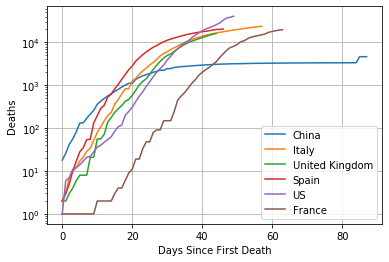

In [8]:
ax = daysSinceFirstDeath.plot(logy=True)
ax.set(xlabel="Days Since First Death", ylabel="Deaths")
ax.grid()
ax.get_figure().savefig('Covid-19 Deaths (Total) - log.png', dpi=600, bbox_inches='tight')

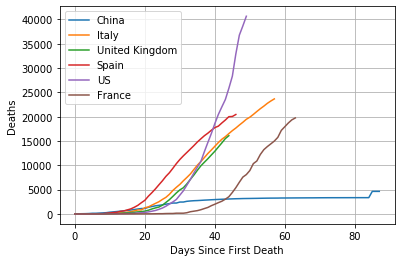

In [9]:
ax = daysSinceFirstDeath.plot()
ax.set(xlabel="Days Since First Death", ylabel="Deaths")
ax.grid()
ax.get_figure().savefig('Covid-19 Deaths (Total) - linear.png', dpi=600, bbox_inches='tight')

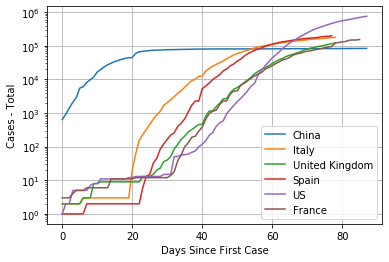

In [10]:
ax2 = daysSinceFirstCase.plot(logy=True)
ax2.set(xlabel="Days Since First Case", ylabel="Cases - Total")
ax2.grid()
ax2.get_figure().savefig('Covid-19 Cases (Total) - log.png', dpi=600, bbox_inches='tight')

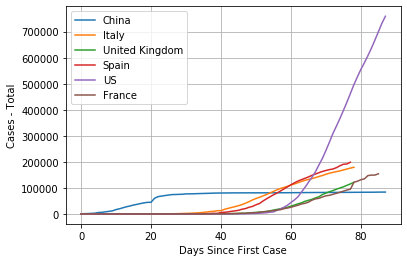

In [11]:
ax2 = daysSinceFirstCase.plot()
ax2.set(xlabel="Days Since First Case", ylabel="Cases - Total")
ax2.grid()
ax2.get_figure().savefig('Covid-19 Cases (Total).png', dpi=600, bbox_inches='tight')

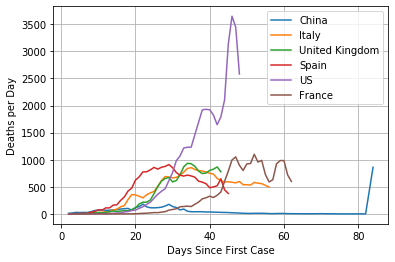

In [13]:
ax3 = deathRateByDate.rolling(window=3).mean().plot()
ax3.set(xlabel="Days Since First Case", ylabel="Deaths per Day")
ax3.grid()
ax3.get_figure().savefig('Covid-19 Deaths per day.png', dpi=600, bbox_inches='tight')

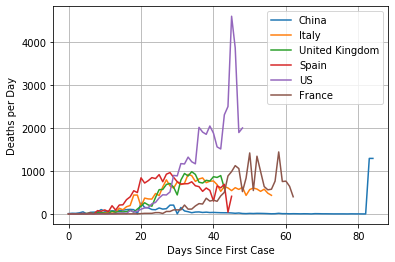

In [14]:
ax3 = deathRateByDate.plot()
ax3.set(xlabel="Days Since First Case", ylabel="Deaths per Day")
ax3.grid()
ax3.get_figure().savefig('Covid-19 Deaths per day - raw.png', dpi=600, bbox_inches='tight')

In [ ]:
deathRateByDate['US'].max()


In [ ]:
daysSinceFirstDeath['US'].max()